<a href="https://colab.research.google.com/github/SergeyAleks00/The-first-practical/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%E2%84%961_%D0%93%D0%BE%D1%82%D0%BE%D0%B2%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1. Обнаружение фальшивых новостей
Фальшивые новости — это ложная информация, распространяемая через социальные сети и другие сетевые СМИ для достижения политических или идеологических целей.

Твоя  задача -  используя библиотеку sklearn построить модель классического машинного обучения, которая может с высокой точностью более 90% определять, является ли новость реальной (REAL） или фальшивой（FAKE).

Ты должен самостоятельно изучить и применить к задаче TfidfVectorizer для извлечения признаков из текстовых данных и PassiveAggressiveClassifier.

Ты  можешь использовать данный датасет для обучения.

Построй матрицу ошибок (confusion matrix). Представь, что ваш заказчик очень любит графики и диаграммы. Визуализируй для него результаты там, где это возможно.

In [ ]:
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv")
with open('fake_news.csv', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

In [ ]:
#Импортируем необходимые библиотеки для дальнейшего обучения модели
from sklearn.model_selection import train_test_split #это библиотека для разделения данных на обучающую и тестовую выборки
from sklearn.feature_extraction.text import TfidfVectorizer # данная библиотека используется для преобразования текстовых данных в числовые значениия
from sklearn.linear_model import PassiveAggressiveClassifier # данная библиотека используется для создания и обучения модели с помощью классификатора
from sklearn.metrics import accuracy_score, confusion_matrix # библиотека используется для оценки точности модели и построения матрицы ошибок
import matplotlib.pyplot as plt # библиотека для визуализации данных
import seaborn as sns # визуализация данных
import pandas as pd # для работы с формато DateFrame
df = pd.read_csv('fake_news.csv') # Загрузка данных

#Разделение данных на признаки и метки. В данном случае мы разделяем данные на признаки (х) и метки (у). Где х - содержит текст новостей, а у - содержат метки (в данном случае "FAKE" и "REAL", исходя из файла fake_news)
x = df['text']
y = df['label']

#Разделение данных на обучающую и тестовую выборки
#Идет разделение данных на обучающую и тестовую выборки. 80% данных используется  для обучения (получили в результате 1 - test_size), а 20% - для тестирования (test_size = 0.2)
#В качестве воспроизводимости результатов, используется значение random_state = 7, как наиболее оптимальное.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

#Преобразование текстовых данных в числовые признаки
#Используется библиотке TfidfVectorizer для преобразования текстовых данных в числовые признаки.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) # метод stop_words удаляет общие английские слова, метод max_df игнорирует слова, которые встречаются в более чем 70% документов.
tfidf_train = tfidf_vectorizer.fit_transform(x_train) #применяем векторизатор к обучающей выборке
tfidf_test = tfidf_vectorizer.transform(x_test) # Применяем векторизатор к тестовой выборке

#Создание и обучение модели
#В этой части кода идет создание модели  с помощью библиотеки "PassiveAggressiveClassifier", где дальше проводится обучение на обучающих данных.
pac = PassiveAggressiveClassifier(max_iter=50) # max_iter задает максимальное количество итераций для обучения. 50 было выбрано, потому что это среднее значения количества итераций. Если необходиом увеличить количество итераций, то модель будет более точной , но в данном случает 50 достаточно.
pac.fit(tfidf_train, y_train)

#Предсказание на тестовых данных
y_pred = pac.predict(tfidf_test) # Используется обученная модель для предсказания меток на тестовых данных.

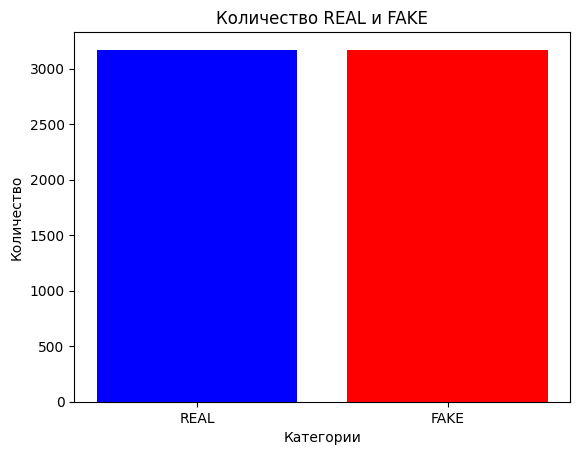

In [ ]:
#Выведем количество FAKE и REAL новостей
# Подсчет количества вхождений слов 'FAKE' и 'REAL'
fake_count = df['label'].value_counts().get('FAKE', 0)
real_count = df['label'].value_counts().get('REAL', 0)
categories = ['REAL', 'FAKE']
values = [fake_count, real_count]
plt.bar(categories, values, color=['blue', 'red'])
plt.title('Количество REAL и FAKE')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.show()

Точность: 92.82%


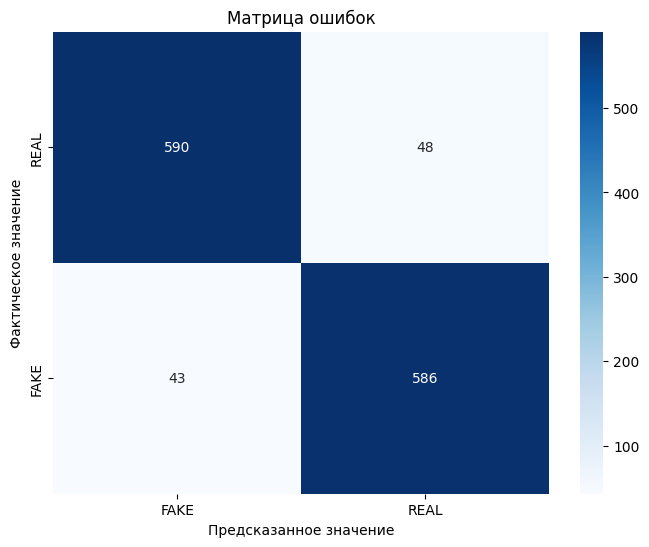

In [ ]:
# Оценка точности модели
score = accuracy_score(y_test, y_pred)
print(f'Точность: {score * 100:.2f}%') # Проводится оценка точности модели, поэтапно сравнивается предсказанные метки с фактическими метками("FAKE" и "REAL").

# Построение матрицы ошибок
conf_mat = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
# Построение матрицы ошибок, которая показывает, сколько раз модель правильно и неправильно классифицировала данные. Далее проводится визуализация матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Предсказанное значение')
plt.ylabel('Фактическое значение')
plt.title('Матрица ошибок')
plt.show()

Вывод:
Как видно из матрицы ошибок предсказанное значение FAKE и REAL новостей, приближено к фактическому, и разницу составляем в несколько единиц. Это очень хороший результат, уоторый удовлетворяет условию задачи >90%

# Задача 2. Обнаружение болезни паркинсона с помощью XGBoost
Твоя задача с помощью Data Science предсказать заболевание паркинсона на ранней стадии, используя алгоритм машинного обучения XGBoost и библиотеку sklearn для нормализации признаков. Как это сделать? Тебя  придется самостоятельно изучить данный вопрос.

Используй следующий датасет UCI ML Parkinsons. Описание признаков и меток датасета представлены здесь. От тебя  требуется помимо создания самой модели получить ее точность на тестовой выборке. Выборки делить в соотношении 80% обучающая, 20% - тестовая.

Дополнительные баллы ты получишь, если сможешь получить точность более 95%.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Точность модели на тестовой выборке: 94.87


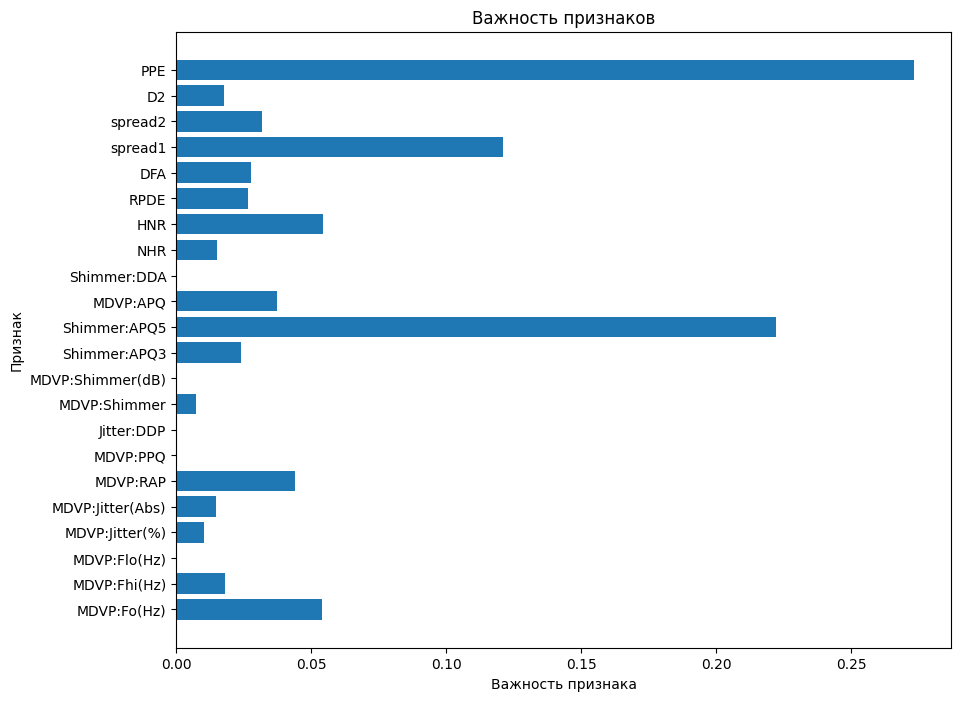

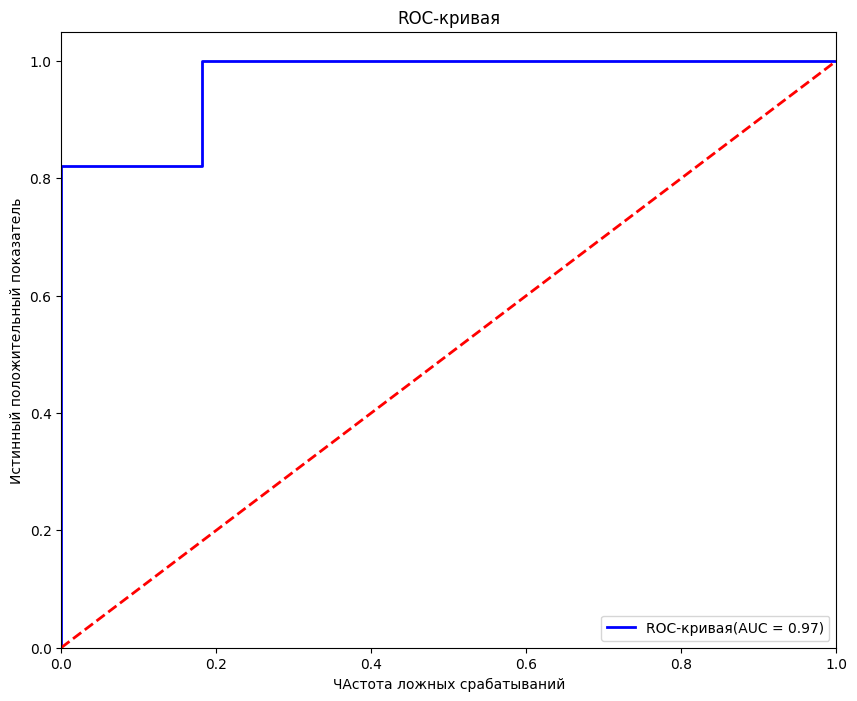

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Шаг 1: Загрузка данных
url = "https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data"
data = pd.read_csv(url)

# Шаг 2: Предобработка данных
# Удалим столбец 'name', так как он не является числовым признаком и не нужен для обучения модели. Этот шаг выполнять не обязательно.
data = data.drop(columns=['name'])

# Разделим данные на признаки (X) и метки (y)
X = data.drop(columns=['status'])
y = data['status']

# Шаг 3: Разделение данных на обучающую и тестовую выборки
# Используем функцию train_test_split для разделения данных на обучающую и тестовую выборки. 80% данных идут на обучение, 20% - на тестирование.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Шаг 4: Нормализация признаков
scaler = StandardScaler() #Создается объект для нормализации данных.
X_train_scaled = scaler.fit_transform(X_train) # Применяется нормализация к обучающей выборке
X_test_scaled = scaler.transform(X_test) # Применяется нормализация к тестовой выборке

# Шаг 5: Обучение модели XGBoost
# Происходит процесс обучения на нормализованных данных обучающей выборки
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_scaled, y_train)

# Шаг 6: Оценка точности модели на тестовой выборке
# Проввдится прогноз метки для тестовой выборки.
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) # Идет вычисление точности модели

print(f"Точность модели на тестовой выборке: {accuracy * 100:.2f}") # Вывод точности на тестовой выборке
#Построение графика важности признаков. Эта гистограмма позволяет легко понять, какие признаки наиболее важны для модели.
plt.figure(figsize=(10, 8))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

#Построение ROC-кривой
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Прогнозируем вероятности классов для тестовой выборки.
# Вычисляем значения для ROC-кривой с помощью функции 'roc_curve'. ROC-кривая используется для оценки качества бинарных классификаторов. Эта зависимость позволяет визуализировать соотношение между чувствительностью и специфичностью при различных порогах классификации. Данная модель очень хорошо подходит для нашего алгоритма обучения.
# Вычисляе мплощадь под кривой (AUC) с помощью функции 'auc'.
# Строим ROC-кривую и добавляем легенду
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label = f'ROC-кривая(AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('ЧАстота ложных срабатываний')
plt.ylabel('Истинный положительный показатель')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Этот код выполняет полный цикл машинного обучения : от загрузки и предобработки данных до обучения модели, оценки ее точности и визуализации результатов.

Вывод: Итак, предсказать заболевание паркинсона на ранней стадии, используя алгоритм обучения XGBoost с точностью 94.87 %. С помощью инструментов визуализации была построена модель важности признаков, которые указаны в DataFrame (на основании этих данных и была проведена точность модели). С помощью визуализатора ROC-кривой , был определен порог классификации модели.


# Задача 3. Прогнозирование оттока клиентов телеком-компании.
Для данной задачи мы будем использовать пубилчный датасет с сайта kaggle

# Цель:
Прогнозировать вероятность ухода клиентов телекоммуникационной компании, чтобы оперативно предпринять действия по их удержанию.

In [ ]:
# Библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
!unzip telecom-churn-datasets.zip

Archive:  telecom-churn-datasets.zip
  inflating: churn-bigml-20.csv      
  inflating: churn-bigml-80.csv      


In [ ]:
# Загрузим данные
# Загружаем первый файл
df1 = pd.read_csv("churn-bigml-20.csv")

# Загружаем второй файл
df2 = pd.read_csv("churn-bigml-80.csv")

# Объединяем данные
df = pd.concat([df1, df2], ignore_index=True)

# Просмотр объединённого датасета
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
# Этап изучения данных
print(df.head())  # Первые записи
print(df.info())  # Общая информация о данных
print(df.describe())  # Статистики

  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95   

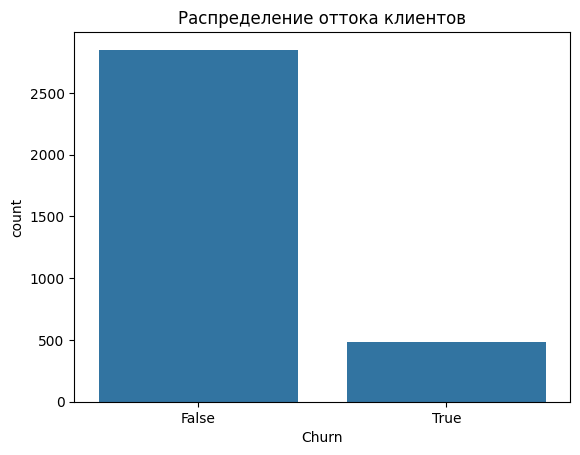

In [ ]:
# Распределение целевых классов
sns.countplot(x="Churn", data=df)
plt.title("Распределение оттока клиентов")
plt.show()

In [ ]:
# Преобразуем категориальные признаки
label_encoder = LabelEncoder()
binary_columns = df.select_dtypes(include=["object"]).columns
for column in binary_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Проверяем наличие отсутствующих значений
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("Нет пустых значений!")

Нет пустых значений!


In [ ]:
# Нормализуем числовые признаки
num_cols = [
    "Account length",
    "Number vmail messages",
    "Total day minutes",
    "Total day calls",
    "Total day charge",
    "Total eve minutes",
    "Total eve calls",
    "Total eve charge",
    "Total night minutes",
    "Total night calls",
    "Total night charge",
    "Total intl minutes",
    "Total intl calls",
    "Total intl charge",
    "Customer service calls"
]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Готовим данные для обучения
X = df.drop(["Churn"], axis=1)  # Больше не удаляем customerID
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Обучение модели
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Предсказания на тестовом множестве
predictions = log_reg.predict(X_test)

In [ ]:
# Оцениваем модель
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Точность модели: {accuracy:.2f}\n")
print("Матрица путаницы:\n", conf_matrix)
print("\nКлассификация отчета:\n", report)

Точность модели: 0.86

Матрица путаницы:
 [[554  17]
 [ 74  22]]

Классификация отчета:
               precision    recall  f1-score   support

       False       0.88      0.97      0.92       571
        True       0.56      0.23      0.33        96

    accuracy                           0.86       667
   macro avg       0.72      0.60      0.63       667
weighted avg       0.84      0.86      0.84       667



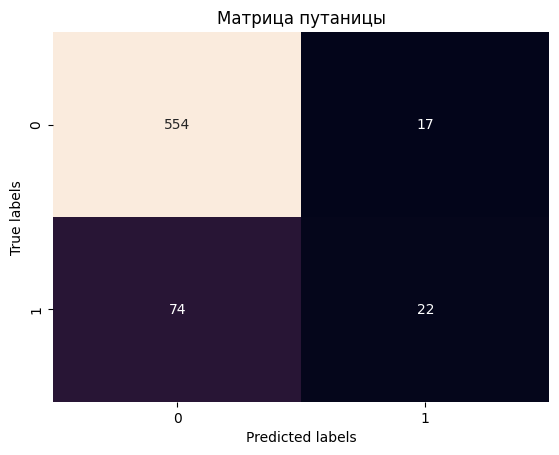

In [ ]:
# Визуализация матрицы путаницы
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.title("Матрица путаницы")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

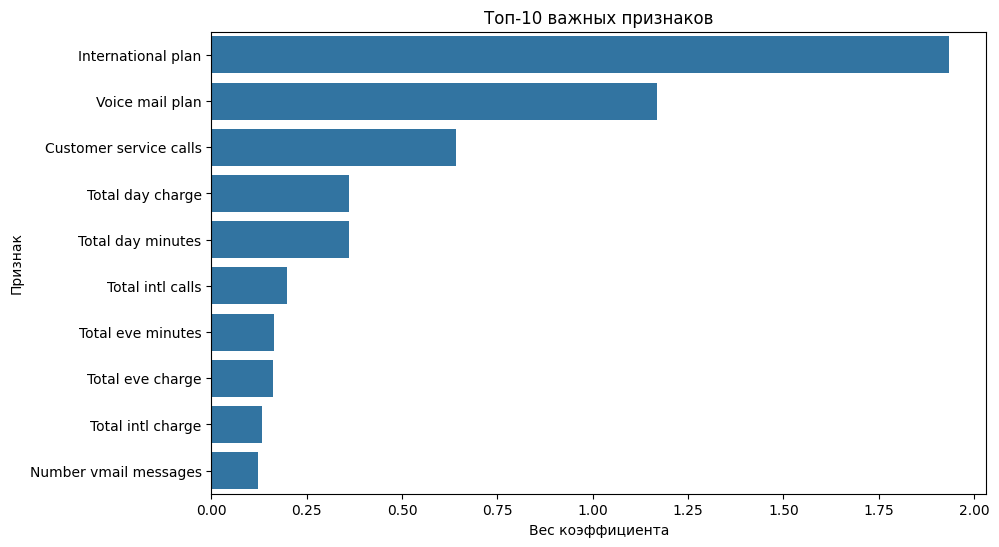

In [ ]:
# График важности признаков
weights = abs(log_reg.coef_[0])
features = X.columns
sorted_weights = sorted(zip(weights, features), reverse=True)
top_10_features = [(w, f) for w, f in sorted_weights[:10]]

plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in top_10_features], y=[x[1] for x in top_10_features])
plt.title("Топ-10 важных признаков")
plt.xlabel("Вес коэффициента")
plt.ylabel("Признак")
plt.show()

# Результаты:
Точность модели составила 86%. Это вполне приемлемый результат для общего уровня успеха, но требует дальнейшего улучшения в отдельных аспектах.
Высокая точность определения лояльных клиентов (97% recall). Модель эффективно различает большинство клиентов, которые останутся с компанией.
Низкий показатель recall для ушедших клиентов (23%). Большинство настоящих положительных случаев (клиентов, покинувших компанию) были ошибочно отнесены моделью к лояльным пользователям.
